In [6]:
%pip install scipy
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
chicago = pd.read_csv("Listings Final Chicago.csv")

In [9]:
chicago['price'] = chicago['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\258016911.py:1: SyntaxWarning: invalid escape sequence '\$'
  chicago['price'] = chicago['price'].replace('[\$,]', '', regex=True).astype(float)


In [10]:
# Convertir 'host_response_rate' de string a float
chicago['host_response_rate'] = chicago['host_response_rate'].replace('[\%,]', '', regex=True).replace('SIN INFORMACIÓN', '0', regex=True).astype(float)

# Convertir 'host_acceptance_rate' de string a float
chicago['host_acceptance_rate'] = chicago['host_acceptance_rate'].replace('[\%,]', '', regex=True).replace('SIN INFORMACIÓN', '0', regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\2392556408.py:2: SyntaxWarning: invalid escape sequence '\%'
  chicago['host_response_rate'] = chicago['host_response_rate'].replace('[\%,]', '', regex=True).replace('SIN INFORMACIÓN', '0', regex=True).astype(float)
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\2392556408.py:5: SyntaxWarning: invalid escape sequence '\%'
  chicago['host_acceptance_rate'] = chicago['host_acceptance_rate'].replace('[\%,]', '', regex=True).replace('SIN INFORMACIÓN', '0', regex=True).astype(float)


In [11]:
#Eliminamos esta columna ya que todos los datos son nulos
chicago= chicago.drop(columns=['neighbourhood_group_cleansed'])
chicago= chicago.drop(columns=['license'])
chicago= chicago.drop(columns=['calendar_updated'])

In [12]:
#Cuarto método de sustitución de valores nulos
#Sustituir valores nulos por un string en  concreto
chicago["description"] = chicago["description"].fillna("DESCRIPCIÓN FALTANTE")
chicago["host_location"] = chicago["host_location"].fillna("SIN INFORMACIÓN")
chicago["host_about"] = chicago["host_about"].fillna("SIN INFORMACIÓN")
chicago["host_response_time"] = chicago["host_response_time"].fillna("SIN INFORMACIÓN")
chicago["host_response_rate"] = chicago["host_response_rate"].fillna("SIN INFORMACIÓN")
chicago["host_acceptance_rate"] = chicago["host_acceptance_rate"].fillna("SIN INFORMACIÓN")
chicago["host_is_superhost"] = chicago["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
chicago["host_neighbourhood"] = chicago["host_neighbourhood"].fillna("SIN INFORMACIÓN")
chicago["neighbourhood"] = chicago["neighbourhood"].fillna("SIN INFORMACIÓN")
chicago["bathrooms_text"] = chicago["bathrooms_text"].fillna("INFORMACIÓN FALTANTE")
chicago["has_availability"] = chicago["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
chicago["first_review"] = chicago["first_review"].fillna("SIN RESEÑA")
chicago["last_review"] = chicago["last_review"].fillna("SIN RESEÑA")

In [13]:
# Sustituir valores nulos con promedio o media
chicago["review_scores_accuracy"] = chicago["review_scores_accuracy"].fillna(round(chicago["review_scores_accuracy"].mean(), 1))
chicago["review_scores_cleanliness"] = chicago["review_scores_cleanliness"].fillna(round(chicago["review_scores_cleanliness"].mean(), 1))
chicago["review_scores_checkin"] = chicago["review_scores_checkin"].fillna(round(chicago["review_scores_checkin"].mean(), 1))
chicago["price"] = chicago["price"].fillna(round(chicago["price"].mean(), 1))
chicago["review_scores_communication"] = chicago["review_scores_communication"].fillna(round(chicago["review_scores_communication"].mean(), 1))
chicago["review_scores_location"] = chicago["review_scores_location"].fillna(round(chicago["review_scores_location"].mean(), 1))
chicago["review_scores_value"] = chicago["review_scores_value"].fillna(round(chicago["review_scores_value"].mean(), 1))
chicago["review_scores_rating"] = chicago["review_scores_rating"].fillna(round(chicago["review_scores_rating"].mean(), 1))
chicago["reviews_per_month"] = chicago["reviews_per_month"].fillna(round(chicago["reviews_per_month"].mean(), 1))


In [14]:
# Sustituir valores nulos por un valor numérico en concreto
chicago["beds"] = chicago["beds"].fillna("-")
chicago["bedrooms"] = chicago["bedrooms"].fillna("-")
chicago["bathrooms"] = chicago["bathrooms"].fillna("-")

In [15]:
chicago_variables = chicago[['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'accommodates', 'reviews_per_month', 'price']]

In [16]:
columnas_cualitativas = chicago_variables.select_dtypes(include = 'object')
columnas_cuantitativas = chicago_variables.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

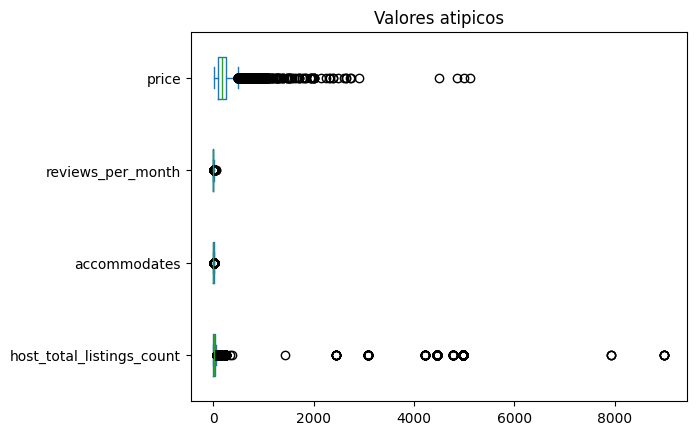

In [17]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [18]:
#Identificar los limites superior e inferior
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido host_total_listings_count    4734.830779
accommodates                   13.541243
reviews_per_month               7.432146
price                         945.637844
dtype: float64
Limite inferior permitido host_total_listings_count   -3785.723385
accommodates                   -4.749995
reviews_per_month              -3.607903
price                        -494.608418
dtype: float64


In [19]:
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [20]:
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

<Figure size 2000x1000 with 0 Axes>

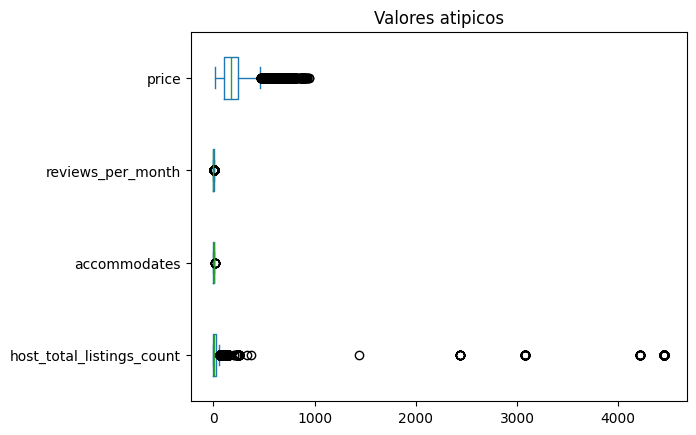

In [21]:
#verificamos
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas_limpio.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [22]:
chicago_limpioooooooo = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
chicago_limpioooooooo.head()

,host_total_listings_count,accommodates,reviews_per_month,price,host_response_rate,host_acceptance_rate
0,1.0,5.0,2.41,103.0,100.0,100.0
1,5.0,6.0,1.74,169.0,100.0,90.0
2,6.0,4.0,0.31,128.0,100.0,99.0
3,1.0,3.0,0.58,96.0,100.0,100.0
4,3.0,6.0,0.46,315.0,89.0,70.0


In [23]:
valores_nulos_Rio_de_janeiro_outliers = chicago_limpioooooooo.isnull().sum()
valores_nulos_Rio_de_janeiro_outliers

host_total_listings_count    0
accommodates                 0
reviews_per_month            0
price                        0
host_response_rate           0
host_acceptance_rate         0
dtype: int64

In [24]:
# Convertir 'host_response_rate' de string a float
chicago_limpioooooooo['host_response_rate'] = chicago_limpioooooooo['host_response_rate'].replace('[\%,]', '', regex=True).replace('SIN INFORMACIÓN', '0', regex=True).astype(float)

# Convertir 'host_acceptance_rate' de string a float
chicago_limpioooooooo['host_acceptance_rate'] = chicago_limpioooooooo['host_acceptance_rate'].replace('[\%,]', '', regex=True).replace('SIN INFORMACIÓN', '0', regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\2375866407.py:2: SyntaxWarning: invalid escape sequence '\%'
  chicago_limpioooooooo['host_response_rate'] = chicago_limpioooooooo['host_response_rate'].replace('[\%,]', '', regex=True).replace('SIN INFORMACIÓN', '0', regex=True).astype(float)
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\2375866407.py:5: SyntaxWarning: invalid escape sequence '\%'
  chicago_limpioooooooo['host_acceptance_rate'] = chicago_limpioooooooo['host_acceptance_rate'].replace('[\%,]', '', regex=True).replace('SIN INFORMACIÓN', '0', regex=True).astype(float)


Usamos las siguientes ecuaciones como funciones de ajuste.

        y = ax^2 + bx + c   ("Función cuadrática") Es útil cuando los datos muestran una tendencia de crecimiento o decrecimiento que no es constante, con una curva simétrica.

        y = a*exp(bx) + c   ("Función exponencial") La función exponencial modela relaciones donde el crecimiento o decrecimiento es rápido al principio y luego se estabiliza.

        y = 1/a*x           ("Función inversa") Esta función modela relaciones inversamente proporcionales. A medida que x aumenta, y decrece de forma proporcional.

        y = a*np.sin(x) + b ("Función senoidal") Esta función modela relaciones periódicas. Es útil cuando los datos tienen una naturaleza cíclica o estacional.

        y = a*np.tan(x) + b ("Función tangencial") La función tangencial tiene un crecimiento asintótico y se usa cuando los datos tienen una curva muy pronunciada.

        y = a*np.abs(x) + b*x + c (Función Valor absoluto) Esta función es útil para modelar relaciones donde el valor de y es sensible al valor absoluto de x, y tiene una pendiente lineal, con un cambio brusco en el valor de x.

        y = (a*x**2 + b)/ c*x (Función cociente entre polinomios) Este tipo de función se usa cuando hay una relación racional entre las variables. Los cocientes de polinomios pueden captar relaciones no lineales que no son simétricas.

        y = a*np.log(x) + b  (Función logaritmica)  La función logarítmica modela relaciones donde el crecimiento inicial es rápido y luego se desacelera. Es útil para relaciones de decrecimiento rápido.

        y = a*x + b*x + c*x (Función lineal con producto de coeficientes) Esta función es una variante de una relación lineal con coeficientes multiplicativos.

        y = 1/a*x**2  (Función cuadrática inversa) Esta función modela relaciones inversamente proporcionales al cuadrado de x, donde y disminuye rápidamente a medida que x aumenta.

        y = a/b*x**2 + c*x (Función polinomial inversa) Una función inversa de este tipo puede modelar relaciones no lineales complejas entre variables, donde y tiene una curva de crecimiento o decrecimiento con respecto a x.

In [25]:
# Lista de pares de variables
variables = [
    ('host_response_rate', 'host_acceptance_rate'),
    ('host_response_rate', 'host_total_listings_count'),
    ('host_response_rate', 'accommodates'),
    ('host_response_rate', 'reviews_per_month'),
    ('host_response_rate', 'price'),
    ('host_acceptance_rate', 'host_total_listings_count'),
    ('host_acceptance_rate', 'accommodates'),
    ('host_acceptance_rate', 'reviews_per_month'),
    ('host_acceptance_rate', 'price'),
    ('host_total_listings_count', 'accommodates'),
    ('host_total_listings_count', 'reviews_per_month'),
    ('host_total_listings_count', 'price'),
    ('accommodates', 'reviews_per_month'),
    ('accommodates', 'price'),
    ('reviews_per_month', 'price'),
]

**Regresión No Lineal - Función Cuadrática**

In [26]:
# Definir la función no lineal
def func1(x, a, b, c):
    return a * np.abs(x) + b * x + c

# Lista para almacenar los resultados
resultados = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros, covs = curve_fit(func1, x, y)
    a, b, c = parametros
    yfit = func1(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2 = r2_score(y, yfit)

    # Almacenar los resultados en la lista
    resultados.append((var1, var2, a, b, c, R2))

# Crear un DataFrame a partir de los resultados
df_resultados = pd.DataFrame(resultados, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados = df_resultados.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados

,Variable 1,Variable 2,a,b,c,R²
0,host_response_rate,host_acceptance_rate,-99.637287,100.368232,19.647999,0.466230
13,accommodates,price,-87.565606,114.610286,92.187367,0.216334
7,host_acceptance_rate,reviews_per_month,-99.998843,100.007237,1.096514,0.027628
12,accommodates,reviews_per_month,101.120343,-101.055548,1.560950,0.015092
11,host_total_listings_count,price,100.014469,-99.985666,199.811020,0.014532
3,host_response_rate,reviews_per_month,-100.000011,100.005508,1.320276,0.010339
9,host_total_listings_count,accommodates,-100.000238,99.999897,4.138315,0.006859
6,host_acceptance_rate,accommodates,-99.999938,100.006141,3.560330,0.004197
4,host_response_rate,price,100.155940,-99.849578,174.846823,0.002642
1,host_response_rate,host_total_listings_count,100.591905,-99.413613,4.487103,0.002232


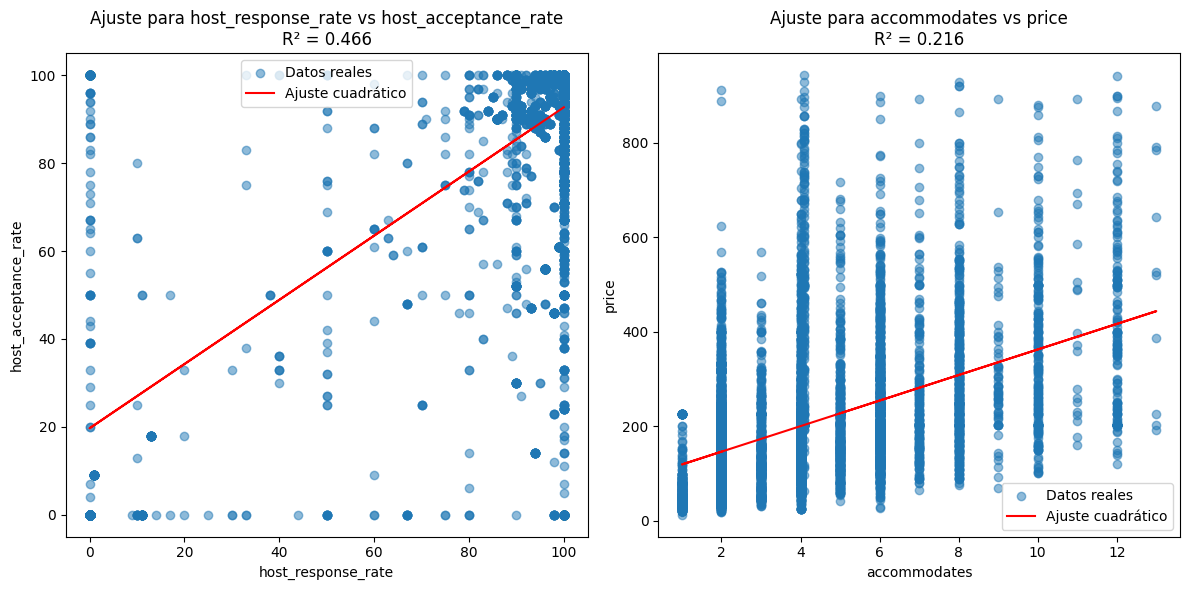

In [27]:
# Graficar los mejores dos modelos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos = df_resultados.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']
    c = row['c']

    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]
    # Use func1 instead of func_cuadratica
    yfit = func1(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i en lugar de index
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit, color='red', label='Ajuste cuadrático')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()


**Regresión No Lineal - Función Exponencial**

In [28]:
# Definir la función exponencial
def func_exponencial(x, a, b, c):
    return a * np.exp(b * x) + c

# Lista para almacenar los resultados
resultados2 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros2, _ = curve_fit(func_exponencial, x, y)
    a, b, c = parametros2  # Use parametros2 instead of parametros
    yfit2 = func_exponencial(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_2 = r2_score(y, yfit2)

    # Almacenar los resultados en la lista
    resultados2.append((var1, var2, a, b, c, R2_2))

# Crear un DataFrame a partir de los resultados
df_resultados2 = pd.DataFrame(resultados2, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados2 = df_resultados2.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados2


c:\Users\Jasiel\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Jasiel\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\3653506623.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, _ = curve_fit(func_exponencial, x, y)


ValueError: Input contains infinity or a value too large for dtype('float64').

**Regresión No Lineal - Función Inversa**

In [29]:
# Definir la función inversa
def func_inversa(x, a):
    return 1 / a * x

# Lista para almacenar los resultados
resultados3 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros3, _ = curve_fit(func_inversa, x, y)
    a = parametros3[0]
    yfit3 = func_inversa(x, a)

    # Calcular el coeficiente de determinación
    R2_3 = r2_score(y, yfit3)

    # Almacenar los resultados en la lista
    resultados3.append((var1, var2, a, R2_3))

# Crear un DataFrame a partir de los resultados
df_resultados3 = pd.DataFrame(resultados3, columns=['Variable 1', 'Variable 2', 'a', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados3 = df_resultados3.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados3

,Variable 1,Variable 2,a,R²
0,host_response_rate,host_acceptance_rate,1.074458,0.429048
13,accommodates,price,0.022945,0.106350
1,host_response_rate,host_total_listings_count,0.817052,0.002228
5,host_acceptance_rate,host_total_listings_count,0.853966,-0.004179
7,host_acceptance_rate,reviews_per_month,50.024913,-0.029695
3,host_response_rate,reviews_per_month,52.854924,-0.055493
4,host_response_rate,price,0.479850,-0.092356
8,host_acceptance_rate,price,0.462628,-0.137382
2,host_response_rate,accommodates,23.855725,-0.146964
6,host_acceptance_rate,accommodates,22.802497,-0.163922


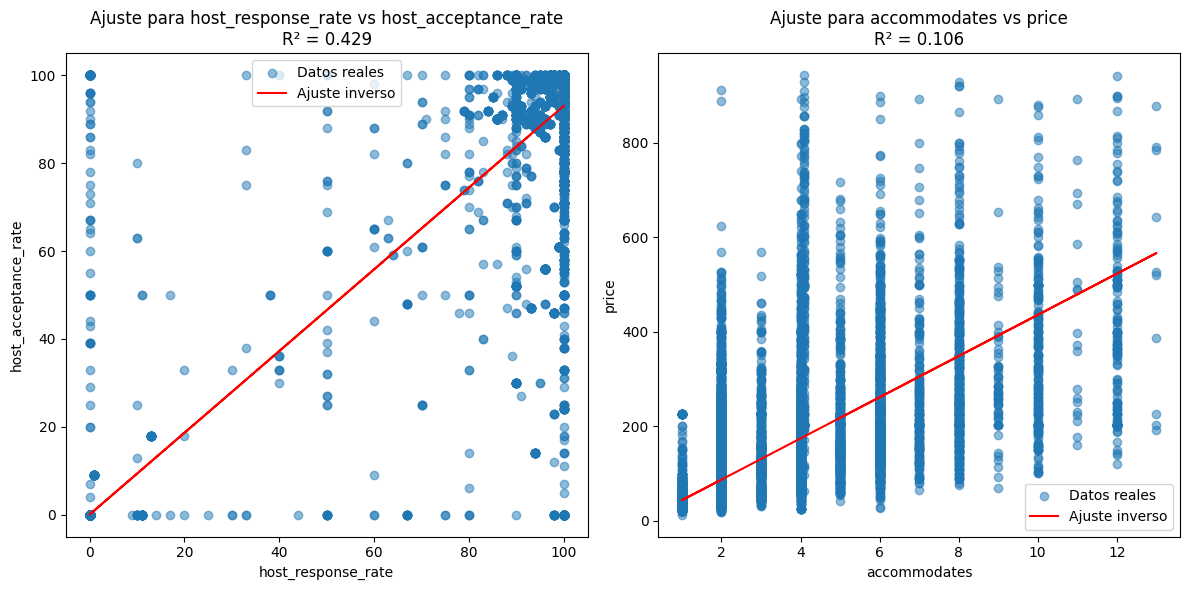

In [30]:
# Graficar los mejores dos modelos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos3 = df_resultados3.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos3.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']

    x = chicago_limpioooooooo[var1].values
    y = chicago_limpioooooooo[var2].values
    yfit3 = func_inversa(x, a)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit3, color='red', label='Ajuste inverso')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

**Regresión No Lineal - Función Senoidal**

In [31]:
# Definir la función senoidal
def func_senoidal(x, a, b):
    return a * np.sin(x) + b

# Lista para almacenar los resultados
resultados4 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros4, _ = curve_fit(func_senoidal, x, y)
    a, b = parametros4
    yfit4 = func_senoidal(x, a, b)

    # Calcular el coeficiente de determinación
    R2_4 = r2_score(y, yfit4)

    # Almacenar los resultados en la lista
    resultados4.append((var1, var2, a, b, R2_4))

# Crear un DataFrame a partir de los resultados
df_resultados4 = pd.DataFrame(resultados4, columns=['Variable 1', 'Variable 2', 'a', 'b', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados4 = df_resultados4.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados4

,Variable 1,Variable 2,a,b,R²
0,host_response_rate,host_acceptance_rate,-14.053372,81.561743,4.990027e-02
13,accommodates,price,-41.861619,208.447002,4.900166e-02
9,host_total_listings_count,accommodates,0.434115,4.028889,1.475731e-02
12,accommodates,reviews_per_month,-0.176283,1.849255,1.056097e-02
6,host_acceptance_rate,accommodates,-0.357320,4.021946,8.031144e-03
8,host_acceptance_rate,price,19.616541,207.343285,7.159249e-03
5,host_acceptance_rate,host_total_listings_count,72.913514,128.918656,5.647041e-03
1,host_response_rate,host_total_listings_count,-105.042501,72.546525,5.135228e-03
7,host_acceptance_rate,reviews_per_month,-0.139248,1.796238,4.384381e-03
14,reviews_per_month,price,15.107784,195.567627,3.294527e-03


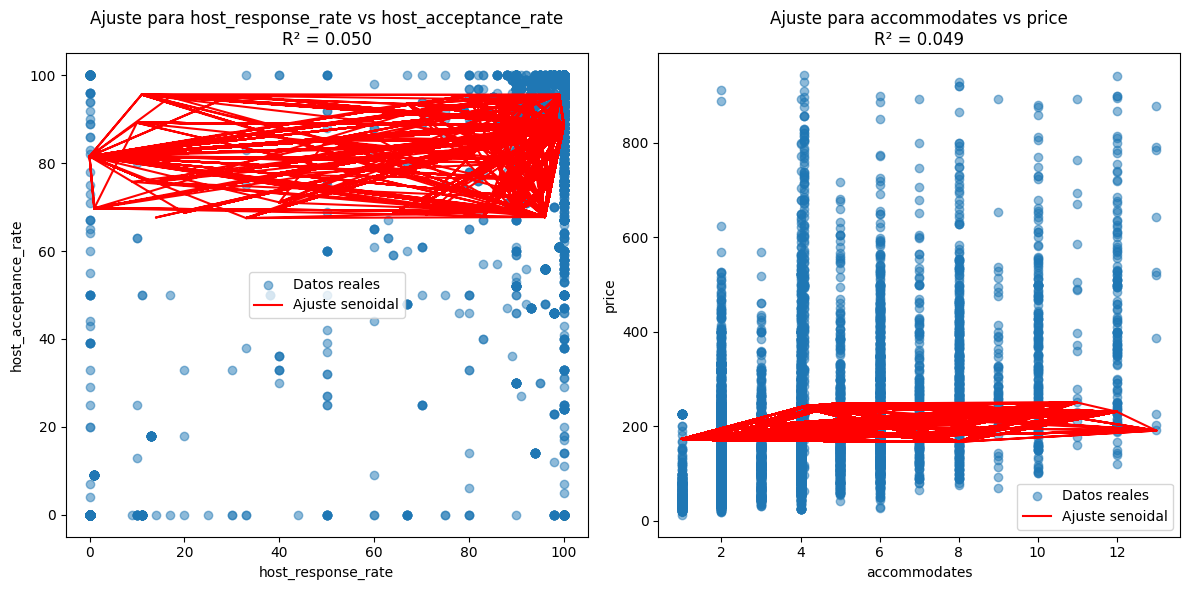

In [32]:
# Graficar los mejores dos modelos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos4 = df_resultados4.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos4.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']

    x = chicago_limpioooooooo[var1].values
    y = chicago_limpioooooooo[var2].values
    yfit4 = func_senoidal(x, a, b)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit4, color='red', label='Ajuste senoidal')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

**Regresión No Lineal - Función Tangencial**

In [33]:
# Definir la función tangencial
def func_tangencial(x, a, b):
    return a * np.tan(x) + b

# Lista para almacenar los resultados
resultados5 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros5, _ = curve_fit(func_tangencial, x, y)
    a, b = parametros5
    yfit5 = func_tangencial(x, a, b)

    # Calcular el coeficiente de determinación
    R2_5 = r2_score(y, yfit5)

    # Almacenar los resultados en la lista
    resultados5.append((var1, var2, a, b, R2_5))


# Crear un DataFrame a partir de los resultados
df_resultados5 = pd.DataFrame(resultados5, columns=['Variable 1', 'Variable 2', 'a', 'b', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados5 = df_resultados5.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados5

,Variable 1,Variable 2,a,b,R²
0,host_response_rate,host_acceptance_rate,0.338804,87.624651,0.033945
13,accommodates,price,-1.021519,201.557400,0.006380
7,host_acceptance_rate,reviews_per_month,-0.011249,1.788830,0.006310
5,host_acceptance_rate,host_total_listings_count,-4.245229,98.769501,0.004221
4,host_response_rate,price,0.616368,204.244964,0.003625
10,host_total_listings_count,reviews_per_month,-0.002512,1.817834,0.002879
2,host_response_rate,accommodates,0.009048,4.117149,0.002641
3,host_response_rate,reviews_per_month,0.004167,1.834565,0.002014
6,host_acceptance_rate,accommodates,-0.010879,4.063326,0.001642
1,host_response_rate,host_total_listings_count,-1.396519,110.351873,0.001062


**Regresión No Lineal - Valor Absoluto** 

In [34]:
# Definir la función valor absoluto
def func_valor_absoluto(x, a, b, c):
    return a * np.abs(x) + b * x + c

# Lista para almacenar los resultados
resultados6 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros6, _ = curve_fit(func_valor_absoluto, x, y)
    a, b, c = parametros6
    yfit6 = func_valor_absoluto(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_6 = r2_score(y, yfit6)

    # Almacenar los resultados en la lista
    resultados6.append((var1, var2, a, b, c, R2_6))

# Crear un DataFrame a partir de los resultados
df_resultados6 = pd.DataFrame(resultados6, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados6 = df_resultados6.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados6

,Variable 1,Variable 2,a,b,c,R²
0,host_response_rate,host_acceptance_rate,-99.637287,100.368232,19.647999,0.466230
13,accommodates,price,-87.565606,114.610286,92.187367,0.216334
7,host_acceptance_rate,reviews_per_month,-99.998843,100.007237,1.096514,0.027628
12,accommodates,reviews_per_month,101.120343,-101.055548,1.560950,0.015092
11,host_total_listings_count,price,100.014469,-99.985666,199.811020,0.014532
3,host_response_rate,reviews_per_month,-100.000011,100.005508,1.320276,0.010339
9,host_total_listings_count,accommodates,-100.000238,99.999897,4.138315,0.006859
6,host_acceptance_rate,accommodates,-99.999938,100.006141,3.560330,0.004197
4,host_response_rate,price,100.155940,-99.849578,174.846823,0.002642
1,host_response_rate,host_total_listings_count,100.591905,-99.413613,4.487103,0.002232


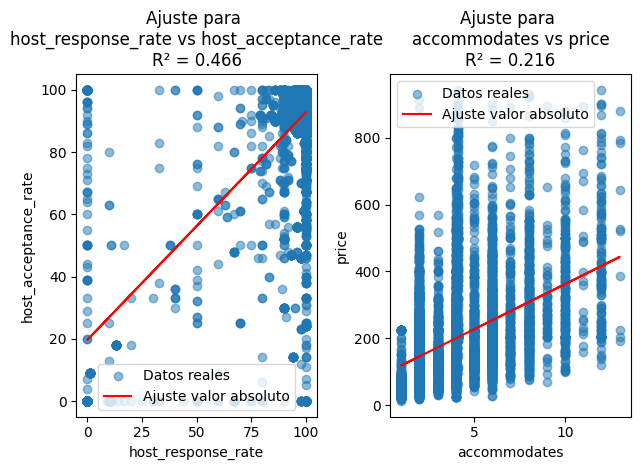

In [35]:
# Obtener los dos mejores modelos
mejores_modelos6 = df_resultados6.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos6.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']
    c = row['c']

    x = chicago_limpioooooooo[var1].values
    y = chicago_limpioooooooo[var2].values
    yfit6 = func_valor_absoluto(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit6, color='red', label='Ajuste valor absoluto')
    plt.title(f'Ajuste para \n{var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

**Regresión No Lineal - Cociente entre polinomios**

In [36]:
# Definir la función cociente entre polinomios
def func_cociente_polinomios(x, a, b, c):
    return (a * x**2 + b) / (c * x + 1e-7)

# Lista para almacenar los resultados
resultados7 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros7, _ = curve_fit(func_cociente_polinomios, x, y)
    a, b, c = parametros7
    yfit7 = func_cociente_polinomios(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_7 = r2_score(y, yfit7)

    # Almacenar los resultados en la lista
    resultados7.append((var1, var2, a, b, c, R2_7))

# Crear un DataFrame a partir de los resultados
df_resultados7 = pd.DataFrame(resultados7, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados7 = df_resultados7.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados7

,Variable 1,Variable 2,a,b,c,R²
0,host_response_rate,host_acceptance_rate,-3.328128e+00,2.437215e-06,-3.575913e+00,0.473788
13,accommodates,price,3.149569e+01,9.429983e+01,8.174027e-01,0.184777
7,host_acceptance_rate,reviews_per_month,-1.193860e+00,1.522632e-07,-5.972185e+01,0.046056
10,host_total_listings_count,reviews_per_month,1.166686e-13,1.939247e-07,2.890167e-10,0.016019
9,host_total_listings_count,accommodates,1.196530e-13,4.295856e-07,1.893298e-10,0.013046
14,reviews_per_month,price,-2.466503e-07,1.875680e-05,-7.438572e-09,0.005698
3,host_response_rate,reviews_per_month,-9.661513e-02,1.422506e-07,-5.106662e+00,0.004269
1,host_response_rate,host_total_listings_count,-7.072603e+04,4.144304e-07,-5.778193e+04,0.002230
4,host_response_rate,price,-2.166472e+04,1.951527e-05,-1.039550e+04,0.000191
5,host_acceptance_rate,host_total_listings_count,-1.341804e+05,8.432494e-07,-1.145750e+05,-0.004168


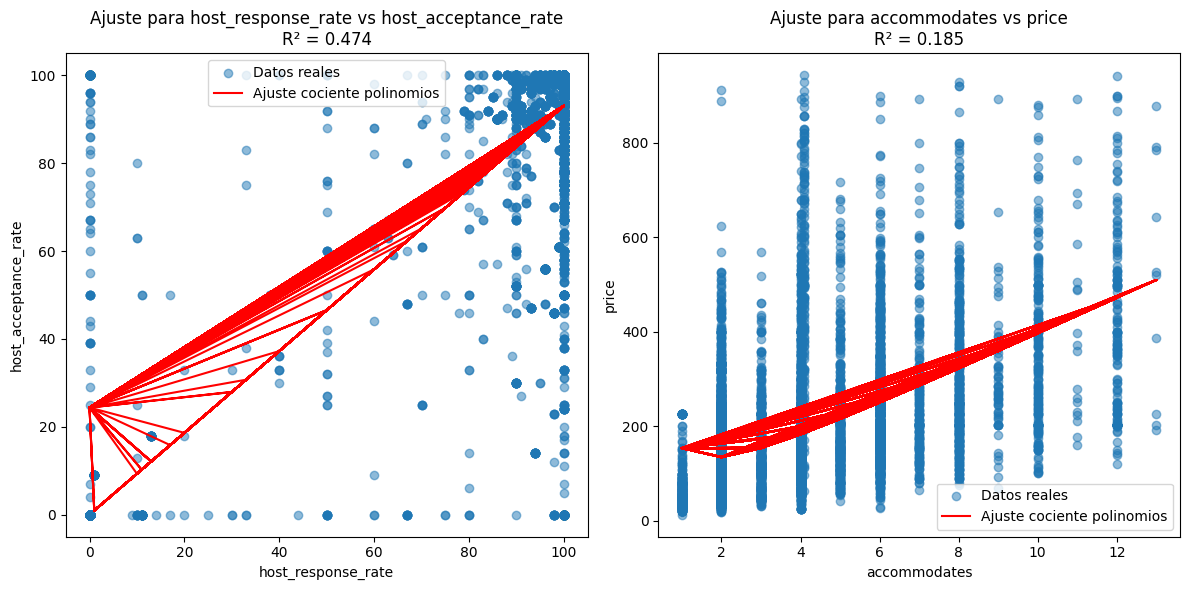

In [37]:
# Graficar los mejores dos modelos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos7 = df_resultados7.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos7.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']
    c = row['c']

    x = chicago_limpioooooooo[var1].values
    y = chicago_limpioooooooo[var2].values
    yfit7 = func_cociente_polinomios(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit7, color='red', label='Ajuste cociente polinomios')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

**Regresión No Lineal - Logaritmica**

In [38]:
# Definir la función logarítmica
def func_logaritmica(x, a, b):
    return a * np.log(x + 1e-7) + b  # Evitar log(0)

# Lista para almacenar los resultados
resultados8 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros8, _ = curve_fit(func_logaritmica, x, y)
    a, b = parametros8
    yfit8 = func_logaritmica(x, a, b)

    # Calcular el coeficiente de determinación
    R2_8 = r2_score(y, yfit8)

    # Almacenar los resultados en la lista
    resultados8.append((var1, var2, a, b, R2_8))

# Crear un DataFrame a partir de los resultados
df_resultados8 = pd.DataFrame(resultados8, columns=['Variable 1', 'Variable 2', 'a', 'b', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados8 = df_resultados8.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados8


,Variable 1,Variable 2,a,b,R²
0,host_response_rate,host_acceptance_rate,3.324362,75.272886,0.339742
13,accommodates,price,110.264447,66.513078,0.210407
11,host_total_listings_count,price,13.163652,174.746964,0.027354
12,accommodates,reviews_per_month,0.329261,1.418835,0.022802
9,host_total_listings_count,accommodates,-0.204884,4.540624,0.022404
10,host_total_listings_count,reviews_per_month,-0.074769,1.987450,0.010725
3,host_response_rate,reviews_per_month,0.021796,1.749859,0.005727
14,reviews_per_month,price,8.797404,201.258933,0.004606
7,host_acceptance_rate,reviews_per_month,0.018291,1.765089,0.004405
1,host_response_rate,host_total_listings_count,5.708327,92.924884,0.001845


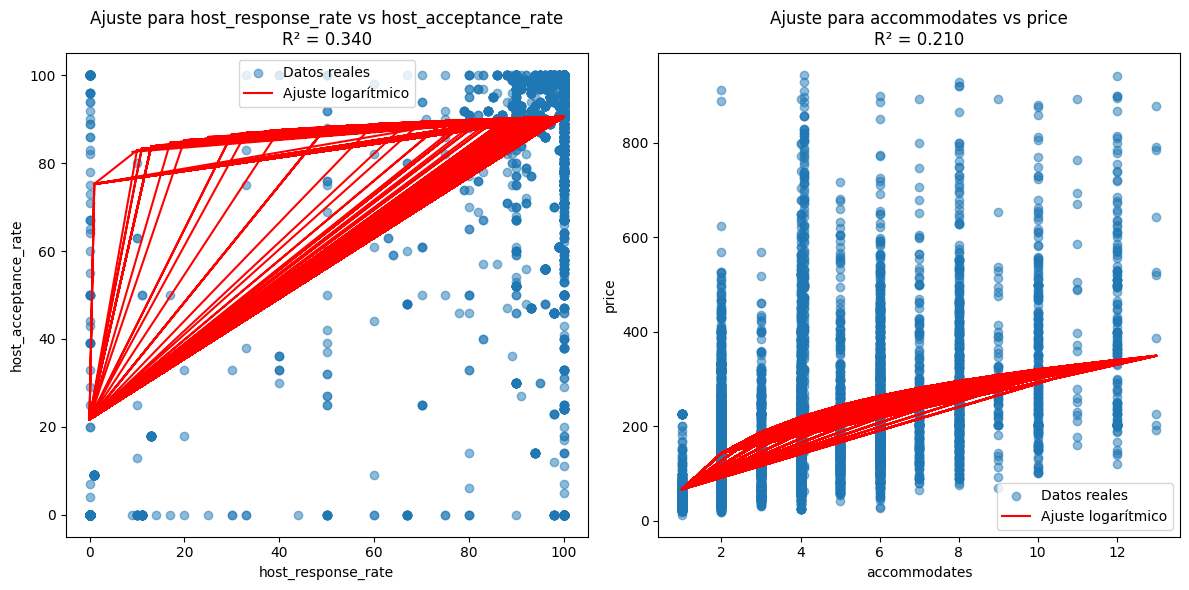

In [39]:
# Graficar los dos mejores modelos logarítmicos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos8 = df_resultados8.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos8.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']

    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]
    yfit8 = func_logaritmica(x, a, b)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit8, color='red', label='Ajuste logarítmico')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

**Regresión No Lineal - Con producto de coeficientes**

In [40]:
# Definir la función lineal con producto de coeficientes
def func_lineal_producto(x, a, b, c):
    return a * x + b * x + c * x

# Lista para almacenar los resultados
resultados9 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros9, _ = curve_fit(func_lineal_producto, x, y)
    a, b, c = parametros9
    yfit9 = func_lineal_producto(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_9 = r2_score(y, yfit9)

    # Almacenar los resultados en la lista
    resultados9.append((var1, var2, a, b, c, R2_9))

# Crear un DataFrame a partir de los resultados
df_resultados9 = pd.DataFrame(resultados9, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados9 = df_resultados9.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados9

,Variable 1,Variable 2,a,b,c,R²
0,host_response_rate,host_acceptance_rate,-141.111122,71.020912,71.020912,0.429048
13,accommodates,price,155.948657,-56.183378,-56.183378,0.106350
1,host_response_rate,host_total_listings_count,141.829327,-70.302708,-70.302708,0.002228
5,host_acceptance_rate,host_total_listings_count,141.811692,-70.320343,-70.320343,-0.004179
7,host_acceptance_rate,reviews_per_month,-141.415042,70.717516,70.717516,-0.029695
3,host_response_rate,reviews_per_month,-141.415076,70.716998,70.716998,-0.055493
4,host_response_rate,price,142.116018,-70.016016,-70.016016,-0.092356
8,host_acceptance_rate,price,142.141878,-69.990156,-69.990156,-0.137382
2,host_response_rate,accommodates,-141.407384,70.724651,70.724651,-0.146964
6,host_acceptance_rate,accommodates,-141.406743,70.725299,70.725299,-0.163922


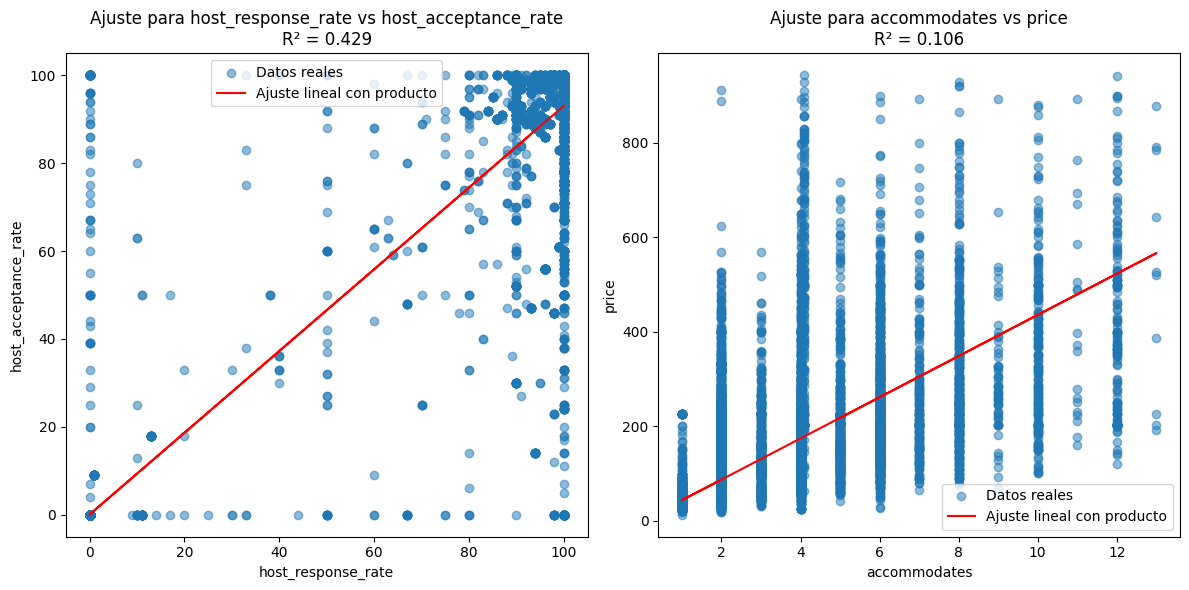

In [41]:
# Graficar los dos mejores modelos lineales con producto de coeficientes
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos9 = df_resultados9.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos9.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']
    c = row['c']

    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]
    yfit9 = func_lineal_producto(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit9, color='red', label='Ajuste lineal con producto')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

**Regresión No Lineal - Cuadrática inversa**

In [42]:
# Definir la función cuadrática inversa
def func_cuadratica_inversa(x, a):
    return 1 / (a * x**2 + 1e-7)  # Evitar división por cero

# Lista para almacenar los resultados
resultados10 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros10, _ = curve_fit(func_cuadratica_inversa, x, y)
    a = parametros10[0]
    yfit10 = func_cuadratica_inversa(x, a)

    # Calcular el coeficiente de determinación
    R2_10 = r2_score(y, yfit)

    # Almacenar los resultados en la lista
    resultados10.append((var1, var2, a, R2_10))

# Crear un DataFrame a partir de los resultados
df_resultados10 = pd.DataFrame(resultados10, columns=['Variable 1', 'Variable 2', 'a', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados10 = df_resultados10.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados10

,Variable 1,Variable 2,a,R²
4,host_response_rate,price,1.000000,0.216334
8,host_acceptance_rate,price,1.000000,0.216334
11,host_total_listings_count,price,0.004281,0.216334
13,accommodates,price,0.003364,0.216334
14,reviews_per_month,price,19.669716,0.216334
1,host_response_rate,host_total_listings_count,1.000000,-0.053406
5,host_acceptance_rate,host_total_listings_count,1.000000,-0.053406
0,host_response_rate,host_acceptance_rate,1.000000,-26.804818
2,host_response_rate,accommodates,1.000000,-7225.075077
6,host_acceptance_rate,accommodates,1.000000,-7225.075077


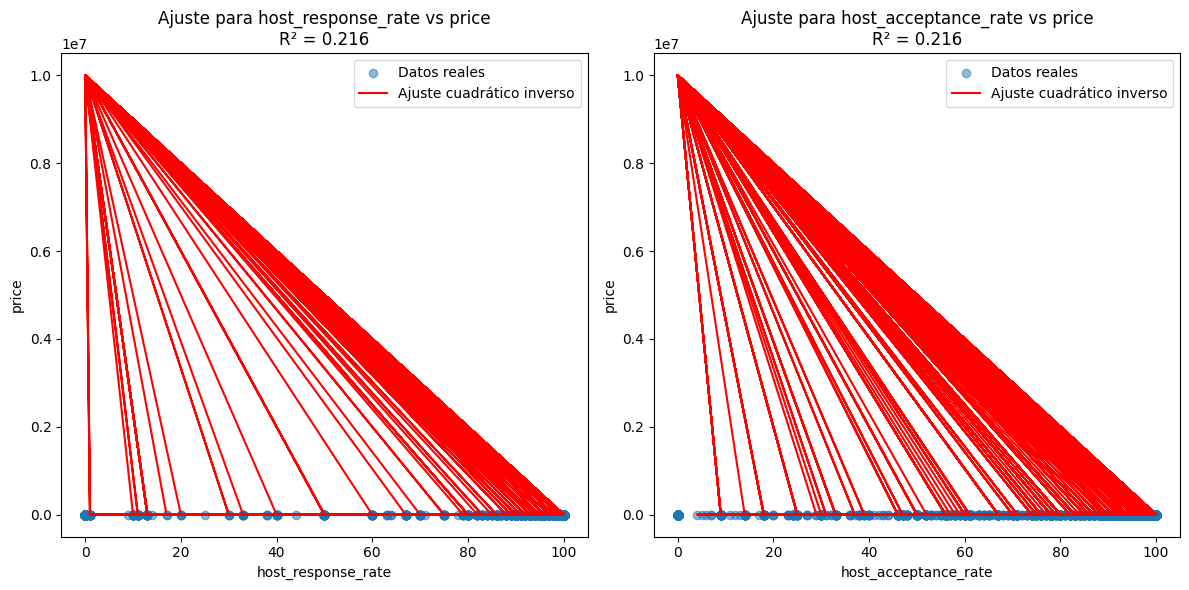

In [43]:
# Graficar los dos mejores modelos de la función cuadrática inversa
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos10 = df_resultados10.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos10.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']

    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]
    yfit10 = func_cuadratica_inversa(x, a)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit10, color='red', label='Ajuste cuadrático inverso')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

**Regresión No Lineal - Polinomial inversa**

In [44]:
# Definir la función polinomial inversa
def func_polinomial_inversa(x, a, b, c):
    return a / (x**2 + b * x + 1e-7) + c  # Evitar división por cero

# Lista para almacenar los resultados
resultados11 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]

    # Ajustar el modelo no lineal
    parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
    a, b, c = parametros11
    yfit11 = func_polinomial_inversa(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_11 = r2_score(y, yfit11)

    # Almacenar los resultados en la lista
    resultados11.append((var1, var2, a, b, c, R2_11))

# Crear un DataFrame a partir de los resultados
df_resultados11 = pd.DataFrame(resultados11, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados11 = df_resultados11.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados11

C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\3654330076.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\3654330076.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\3654330076.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\3654330076.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
C:\Users\Jasiel\AppData\Local\Temp\ipykernel_3376\3654330076.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
C:\Users\J

,Variable 1,Variable 2,a,b,c,R²
0,host_response_rate,host_acceptance_rate,-6.587702e-06,328.975141,90.249173,0.310635
13,accommodates,price,2.843938e+06,-10162.623445,299.681738,0.172659
12,accommodates,reviews_per_month,-1.091285e+01,10.514409,2.112034,0.026446
9,host_total_listings_count,accommodates,4.300292e+04,40454.849979,3.764283,0.023470
10,host_total_listings_count,reviews_per_month,4.441513e-01,0.369224,1.750739,0.008559
3,host_response_rate,reviews_per_month,-4.252123e-08,3.293139,1.847719,0.005075
11,host_total_listings_count,price,3.869084e+03,-150.247032,211.444139,0.004043
7,host_acceptance_rate,reviews_per_month,-3.216412e-08,244.364370,1.844273,0.003194
14,reviews_per_month,price,1.951384e+03,-1828.755408,205.288656,0.001778
5,host_acceptance_rate,host_total_listings_count,-1.106714e-05,30793.421546,119.103942,0.001777


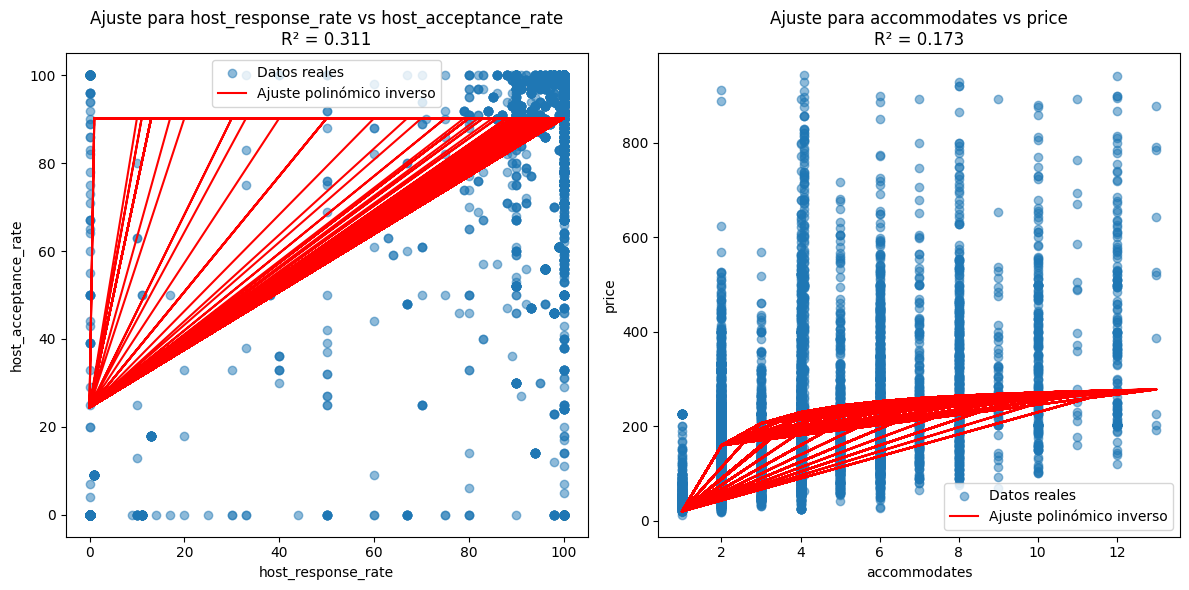

In [45]:
# Graficar los dos mejores modelos de la función polinomial inversa
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos11 = df_resultados11.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos11.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a, b, c = row['a'], row['b'], row['c']

    x = chicago_limpioooooooo[var1]
    y = chicago_limpioooooooo[var2]
    yfit11 = func_polinomial_inversa(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit11, color='red', label='Ajuste polinómico inverso')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

In [46]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [47]:
# Crear listas para almacenar resultados de cada modelo
resultados_totales = []

# Agregar resultados de cada modelo
for resultados, nombre_modelo in zip(
    [resultados,resultados2,resultados3,resultados4,resultados5, resultados6, resultados7, resultados8, resultados9, resultados10, resultados11],
    ['Cuadratica','Exponencial','Inversa','Senoidal', 'Tangencial', 'Valor Absoluto', 'Cociente Polinómico', 'Logarítmica', 'Lineal Producto', 'Cuadrática Inversa', 'Polinomial Inversa']
):
    for res in resultados:
        # Agregar tipo de función y variables a la lista
        # res[-1] contiene R², y res[0], res[1] contienen las variables
        resultados_totales.append((nombre_modelo, res[0], res[1], res[-1]))  # modelo, variable1, variable2, R²

# Crear un DataFrame a partir de todos los resultados
df_resultados_totales = pd.DataFrame(resultados_totales, columns=['Tipo de Función', 'Variable 1', 'Variable 2', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados_totales = df_resultados_totales.sort_values(by='R²', ascending=False)

# Reiniciar el índice para que comience en 1
df_resultados_totales.reset_index(drop=True, inplace=True)
df_resultados_totales.index += 1  # Iniciar la numeración desde 1

# Mostrar la tabla
df_resultados_totales


,Tipo de Función,Variable 1,Variable 2,R²
1,Cociente Polinómico,host_response_rate,host_acceptance_rate,4.737883e-01
2,Cuadratica,host_response_rate,host_acceptance_rate,4.662303e-01
3,Valor Absoluto,host_response_rate,host_acceptance_rate,4.662303e-01
4,Inversa,host_response_rate,host_acceptance_rate,4.290483e-01
5,Lineal Producto,host_response_rate,host_acceptance_rate,4.290483e-01
6,Logarítmica,host_response_rate,host_acceptance_rate,3.397417e-01
7,Polinomial Inversa,host_response_rate,host_acceptance_rate,3.106345e-01
8,Cuadrática Inversa,host_acceptance_rate,price,2.163335e-01
9,Cuadrática Inversa,accommodates,price,2.163335e-01
10,Cuadrática Inversa,host_total_listings_count,price,2.163335e-01
